# ARMA Models in `statsmodels`

## Introduction

In this lesson, you'll use your knowledge of the autoregressive (AR) and moving average (MA) models, along with the `statsmodels` library to model time series data. 

## Objectives

You will be able to:

- Fit an AR model using `statsmodels` 
- Fit an MA model using `statsmodels` 

## Generate a first order AR model 

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Let's assume a mean-zero white noise with a standard deviation of 2. We'll also create a daily datetime index ranging from January 2017 until the end of March 2018.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(11225)

# Create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')

We will generate a first order AR model with $\phi = 0.7$ , $\mu=5$ , and $Y_0= 8$. 

In [2]:
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

In [3]:
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu

Let's plot the time series to verify: 

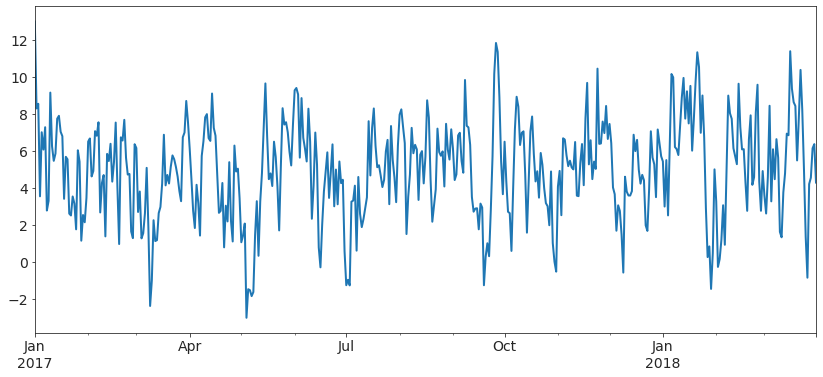

In [4]:
import seaborn as sns
sns.set_style('ticks')

series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

## Look at the ACF and PACF of the model

Although we can use `pandas` to plot the ACF, we highly recommended that you use the `statsmodels` variant instead. 

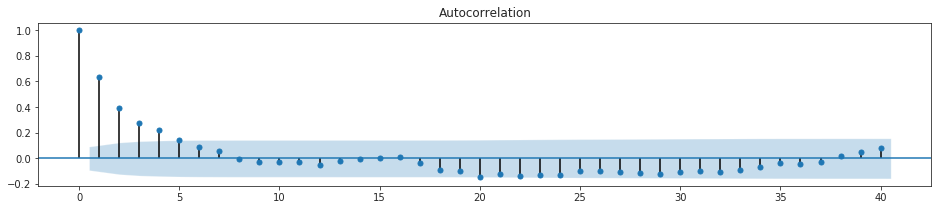

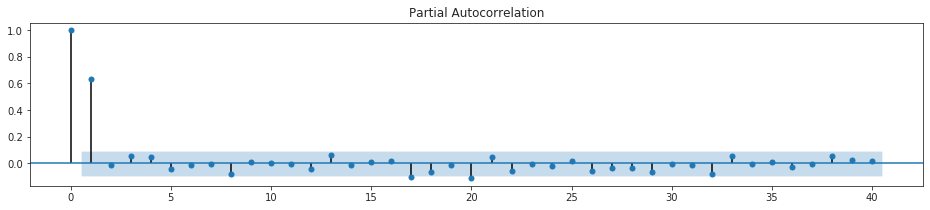

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

## Check the model with ARMA in `statsmodels`

`statsmodels` also has a tool that fits ARMA models to time series. The only thing we have to do is provide the number of orders for AR and MA. Have a look at the code below, and the output of the code. 

The `ARMA()` function requires two arguments: the first is the time series to which the model is fit, and the second is the `order` in the form `(p,q)` -- where `p` refers to the order of AR and `q` refers to the order of MA. For example, a first order AR model would be represented as `(1,0)`.  

In [14]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(series, order=(1,0))

Once you have instantiated the AR(1) model, you can call the `.fit()` method to the fit the model to the data. 

In [15]:
# Fit the model to data
res_arma = mod_arma.fit()

Similar to other models, you can then call the `.summary()` method to print the information of the model. 

In [16]:
# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Mon, 08 Jun 2020   AIC                           1943.395
Time:                        17:30:58   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect. You can use the `.params` attribute to check these values. 

In [17]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const      4.966377
ar.L1.y    0.647429
dtype: float64


## Generate a first order MA model


Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. We'll also generate a daily datetime index ranging from April 2015 until the end of August 2015. 

We will generate a first order MA model with $\theta = 0.9$ and $\mu=7$ . 

In [18]:
np.random.seed(1234)

# Create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')

error = np.random.normal(0, 4, len(dates))
mu = 7
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]

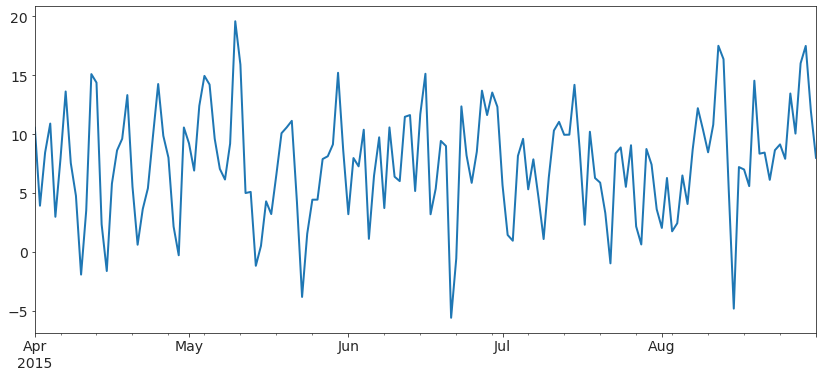

In [19]:
series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

## Look at the ACF and PACF of the model

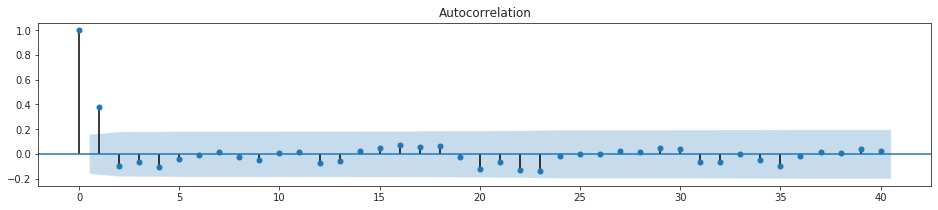

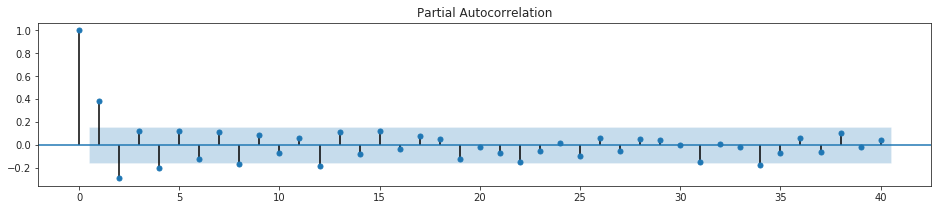

In [20]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

## Check the model with ARMA in `statsmodels`

Let's fit an MA model to verify the parameters are estimated correctly. The first order MA model would be represented as `(0,1)`. 

In [21]:
# Instantiate and fit an MA(1) model to the simulated data
mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Mon, 08 Jun 2020   AIC                            858.757
Time:                        17:31:36   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.y        0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots           

In [22]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const      7.537293
ma.L1.y    0.872683
dtype: float64


## Summary

Great job! In this lesson, you saw how you can use the AR and MA models using the `ARMA()` function from `statsmodels` by specifying the order in the form of `(p,q)`, where at least one of `p` or `q` was zero depending on the kind of model fit. You can use `ARMA()` to fit a combined ARMA model as well -- which you will do in the next lab! 